In [1]:
import pandas as pd

data = pd.read_json('ultimate_data_challenge.json')
print(data.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   

In [2]:
df = pd.read_json('logins.json')
print(df.head())
df.dtypes

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


login_time    datetime64[ns]
dtype: object

In [3]:
df["login_time"].min(), df["login_time"].max()

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

In [4]:
df["login_time"].max() - df["login_time"].min()

Timedelta('101 days 22:45:22')

In [5]:
df['login_count'] = 1

In [6]:
df.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
#converting string to datetime

df['login_time'] = pd.to_datetime(df['login_time'])

df = df.set_index('login_time')


In [8]:
df = df.resample('15T').sum()
df.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.isna().sum()

login_count    0
dtype: int64

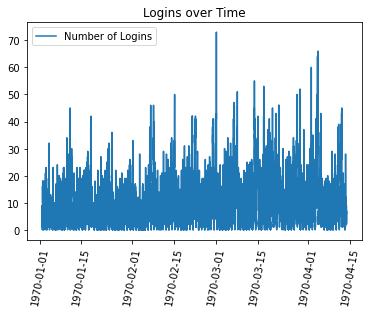

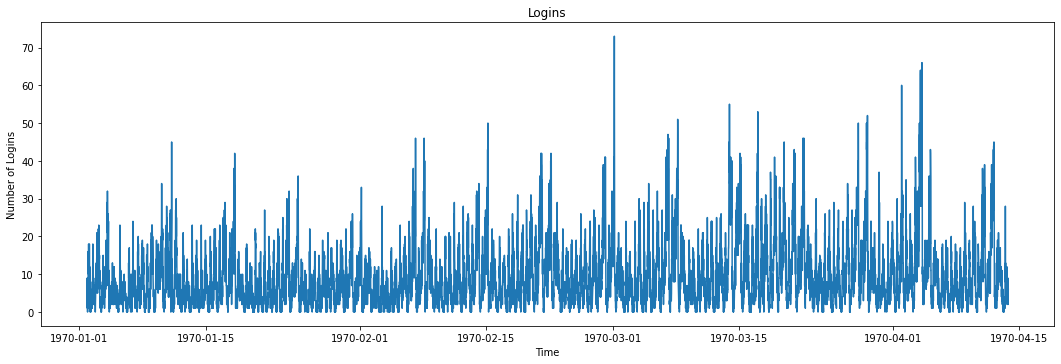

In [22]:
# scatterplot of the binned data
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.tight_layout()
plt.title('Logins')
# puts the data in the figure
plt.plot(df.index, df.login_count)

In [ ]:
##There are some patterns that jump out. Looks like frequency has diel pattern as well as a weekly pattern.

In [25]:
daily = df.resample('D').sum()
fridays = df.resample('W-FRI').sum()
saturdays = df.resample('W-SAT').sum()
sundays = df.resample('W-SUN').sum()
daily.head()

,login_count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


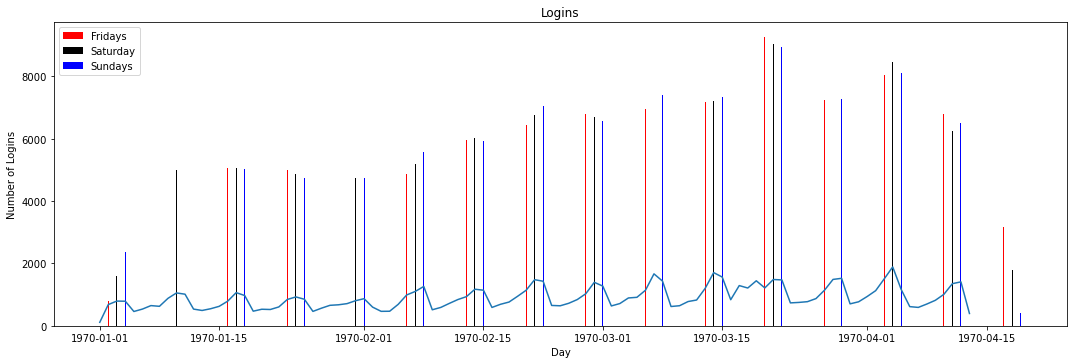

In [28]:
# scatterplot of the binned data
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Day')
plt.ylabel('Number of Logins')
plt.tight_layout()
plt.title('Logins')
# puts the data in the figure
plt.plot(daily.index, daily.login_count)
plt.bar(fridays.index, fridays.login_count, align= 'center', width = 0.1, label = "Fridays", color = 'red')
plt.bar(saturdays.index, saturdays.login_count, label = 'Saturday', align = 'center', width = 0.1, color = 'black')
plt.bar(sundays.index, sundays.login_count, label = "Sundays", align= 'center', width = 0.1, color = 'blue')
plt.legend(loc='upper left')

#Frequency of logins increases around the weekend.

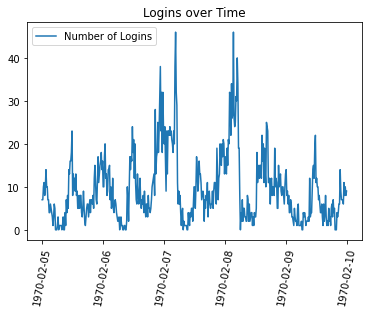

In [31]:
feb = df["1970-02-05" : "1970-02-09"]
plt.plot(feb['login_count'], label = 'Number of Logins')
plt.xticks(rotation=80)
plt.title('Logins over Time')
plt.legend(loc='upper left')

In [32]:
# resample index hourly
daily_logins = df.resample('H').sum()
# make a column that identify the day of week; Monday=0, Sunday=6
day_of_week = list(daily_logins.index.dayofweek)
daily_logins['day_of_week'] = day_of_week
# add column with just the hour (omiting the date)
daily_logins['hour'] = [time.hour for time in daily_logins.index]

In [33]:
# create dataframe of the average number of logins for each hour of each day
avg_hourly_logins = pd.pivot_table(daily_logins, values = 'login_count', index = 'hour', columns = 'day_of_week', aggfunc=np.mean).rename(columns= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
# stack
avg_hourly_logins = avg_hourly_logins.stack(level=['day_of_week'])
# name the stack
avg_hourly_logins.name = 'avg_num_logins'
avg_hourly_logins_df = avg_hourly_logins.reset_index()

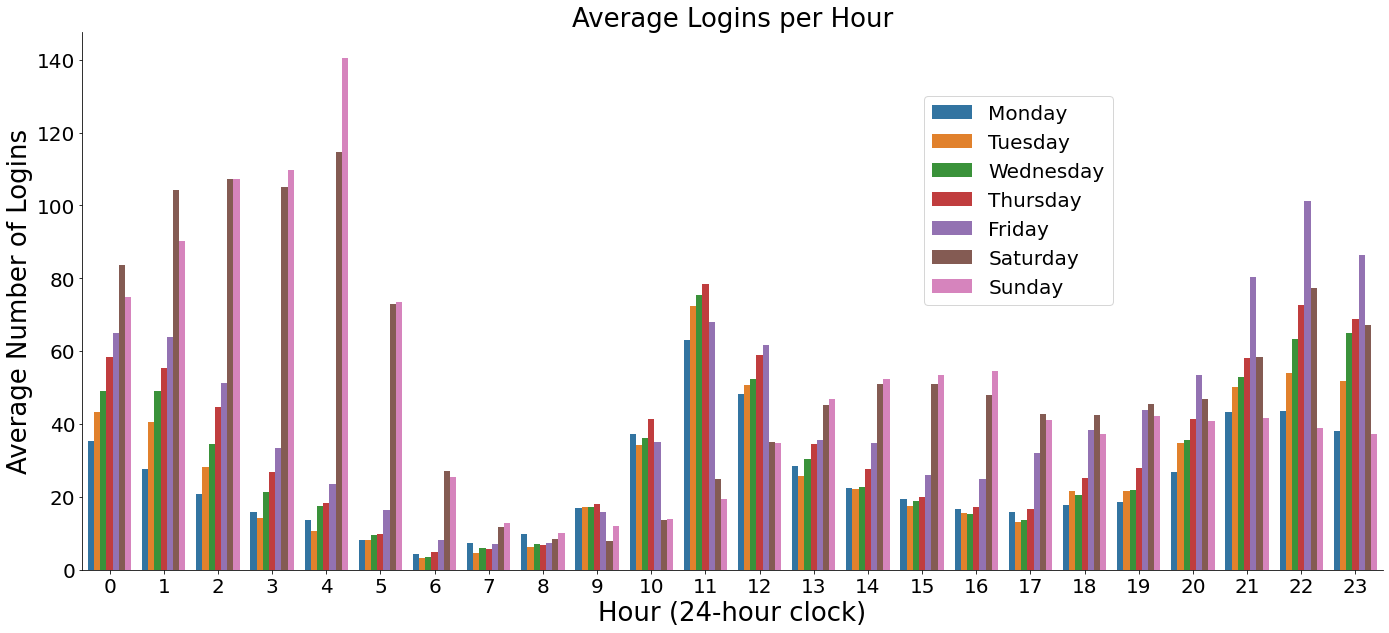

In [34]:
# plot average hourly use
sns.catplot(x='hour', y='avg_num_logins', data=avg_hourly_logins_df, kind = 'bar', 
            hue='day_of_week',height=8, aspect=11.7/5, legend=False)
ax = plt.gca()
ax.set_title('Average Logins per Hour', fontsize = 26)
ax.set_xlabel('Hour (24-hour clock)', fontsize = 26)
ax.set_ylabel('Average Number of Logins', fontsize = 26)
ax.tick_params(labelsize=20,labelcolor="black")
ax.legend(bbox_to_anchor=(0.7,0.7,0.1, 0.2),fontsize=20)

#Again, findings indicate more logins on the weekend. I'm wondering if there are some mistakes, because it seems strange
to have such high logins at 3-4am. Hours of use are diel with peaks around 11am and at night (between 10pm-4am).

##Part 2
1. Ulimate paying for the drivers' tolls would only make sense if the driver makes more money by crossing the bridge. I would consider 1) the average number of rides a driver has in one day in each city and 2) the average profit from each ride in each city. At a minimun, the driver would have to pay the toll both ways to give only one ride. Would that one ride make enough profit to outweigh the toll? 

2. I would implement an experiment where several 'test' drivers are granted reimbursements for their tolls and then monitor their rides and profits. Null hypothosesis: The driver will have no change in the profit they make when reibursed for tolls. Alternate hypothesis: There will be a significant difference in the amount of profit they make when reimbursed for tolls. 

I would then collect the data on those test drivers for a week or two and compare them with the non-test drivers. Did the drivers have increased number of riders? If so, were the rides long enough that they made a profit above the toll cost? I would use a regression analysis to analyze if paying tolls made a difference in driver profit. 

If the null hypothesis is rejected, and drivers are making an increase in profit that outweighs the cost of tolls, then I would recommend that Ultimate start paying for their tolls. Even if they didn't do it full time, it may be that it would be worth it to pay for tolls only during weekends or peak hours. 


In [ ]:
##Part 3

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
# convert dates to datetime objects
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

# find the date the data was pulled
pull_date = data.last_trip_date.max()

# determine 30 days previous to the pull day
cut_off_day = pull_date - pd.Timedelta('30 days')

# add active status to dataframe 0= inactive, 1 = active
data['active_status'] = (data.last_trip_date > cut_off_day).astype('int')

# add dummies to categorical data
data = pd.get_dummies(data, columns = ['city', 'phone'])

In [6]:
# separate the active and inactive users
active_user = data[data.active_status == 1]
inactive_user = data[data.active_status == 0]

In [7]:
# fraction of the observed users that were retained
fraction = round((len(active_user.active_status)/len(data.active_status)) * 100, 2)
print('{} percent of users were retained.'.format(fraction))

36.62 percent of users were retained.


In [8]:
data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


<AxesSubplot:>

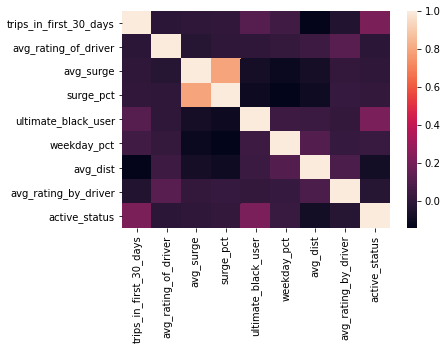

In [10]:
corr = data.corr()
sns.heatmap(corr)


#If I zero in on 'active_status', it looks to be potentially related to trips in the first 30 days, ultimate black user, if they're in King's Landing, and what type of phone they have.

<AxesSubplot:xlabel='active_status', ylabel='count'>

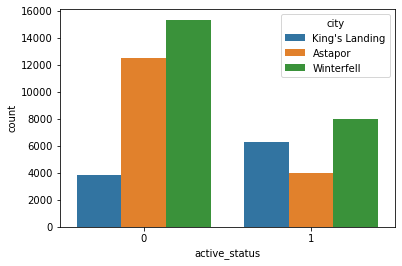

In [11]:
sns.countplot(x='active_status',hue='city',data=data)

<AxesSubplot:xlabel='active_status', ylabel='count'>

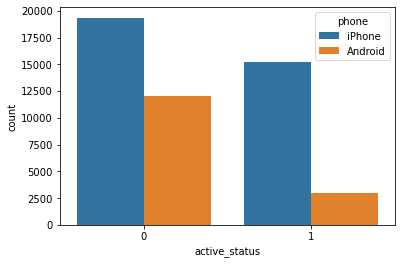

In [12]:
sns.countplot(x='active_status',hue='phone',data=data)

<AxesSubplot:xlabel='active_status', ylabel='count'>

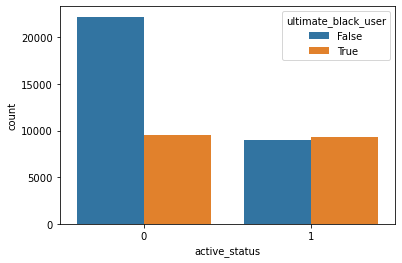

In [13]:
sns.countplot(x='active_status',hue='ultimate_black_user',data=data)

In [5]:
data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [9]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_status,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.36620,0.330680,0.202600,0.466720,0.300440,0.691640
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.48177,0.470463,0.401941,0.498896,0.458454,0.461821
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'active_status',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone'],
      dtype='object')

In [11]:
# calculate the mean and standard deviation for each feature
feature_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct','city_Astapor', "city_King's Landing", 'city_Winterfell',
       'phone_Android', 'phone_iPhone']
stats_dict = {}
for col in feature_columns:
    stats_dict[col] = [active_user[col].mean(), active_user[col].std(),
                       inactive_user[col].mean(),inactive_user[col].std()]

In [12]:

# create a dataframe of the statistics
stats_df = pd.DataFrame.from_dict(stats_dict, orient='index').rename(columns = {0:'active_mean', 1:'active_std', 2:'inactive_mean', 3:'inactive_std'})

Text(0.5, 1.0, 'Average of Features for Active and Inactive Users')

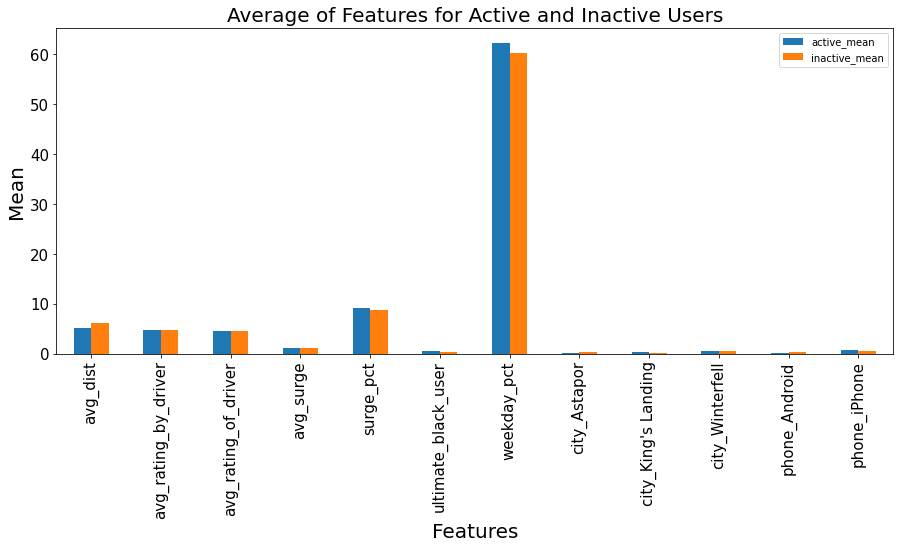

In [9]:
# visualize the statistics
stats_df[['active_mean', 'inactive_mean']].plot(kind = 'bar', yerr=stats_df[['active_std','inactive_std']], figsize = (15,6), fontsize = 15)
plt.xlabel('Features',fontsize = 20)
plt.ylabel('Mean', fontsize = 20)
plt.title('Average of Features for Active and Inactive Users', fontsize = 20)

#There are no obvious differences that jump out. Those that use ultimate on weekdays have much higher numbers of rides than any other category. That figure may need to be normalized.

In [13]:
data.isna().sum()

trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_status                0
city_Astapor                 0
city_King's Landing          0
city_Winterfell              0
phone_Android                0
phone_iPhone                 0
dtype: int64

In [14]:
data['avg_rating_of_driver'] = data['avg_rating_of_driver'].fillna(value=4.601559)

In [15]:
data['avg_rating_by_driver'] = data['avg_rating_by_driver'].fillna(value=4.778158)

In [16]:
data.isna().sum()

trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active_status             0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
phone_Android             0
phone_iPhone              0
dtype: int64

In [17]:
#going to try a knn model. need to convert timestamps to float
data['signup_date'] = pd.to_numeric(pd.to_datetime(data['signup_date']))
data['last_trip_date'] = pd.to_numeric(pd.to_datetime(data['last_trip_date']))

In [18]:
#Going to try KNN first 

#assign X and y
X = data[['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'city_Astapor', "city_King's Landing", 'city_Winterfell',
       'phone_Android', 'phone_iPhone']].values
y = data['active_status'].values

In [19]:
#create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
#make prediction
y_pred = classifier.predict(X_test)

In [23]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5746  468]
 [ 283 3503]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6214
           1       0.88      0.93      0.90      3786

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.93     10000



#This model was 92% accurate in predicting active rider status. 

In [25]:
#comparing error with K
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

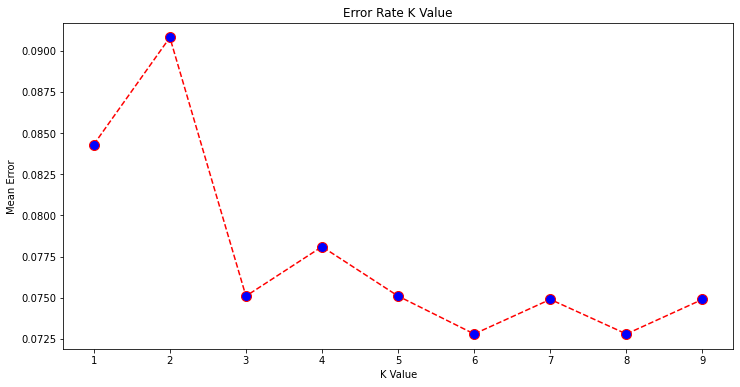

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#looks like either k=5 or k=6 is best for the model. I will try k=6, although I am a little worried about overfitting

In [28]:
#fitting the new model
classifier6 = KNeighborsClassifier(n_neighbors=6)
classifier6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [29]:
#make prediction
y_pred = classifier6.predict(X_test)

In [30]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5878  336]
 [ 392 3394]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6214
           1       0.91      0.90      0.90      3786

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


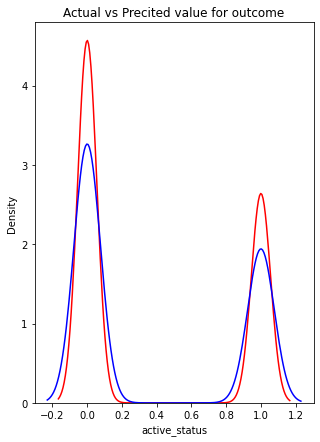

In [32]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['active_status'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

#Accuracy improved to 93% when changing k=6. That's pretty good, so I think this model could be used to predict rider retention. It seems the most important features are average distance taken and whether or not they use it on the weekdays. I would monitor those features in particular.
